In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [38]:
airlines=pd.read_excel('EastWestAirlines.xlsx')
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [40]:
from sklearn.preprocessing import MinMaxScaler
trans= MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(airlines.iloc[:,1:]))
data

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


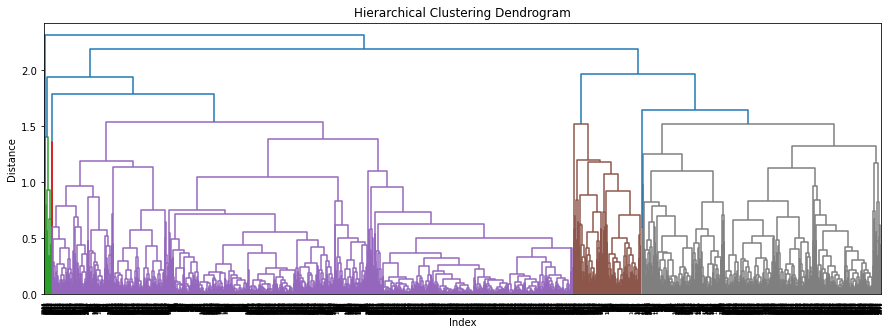

In [68]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(data, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z,)
plt.show()

Since we cannot cut the dendogram we use Kmeans Clustering 

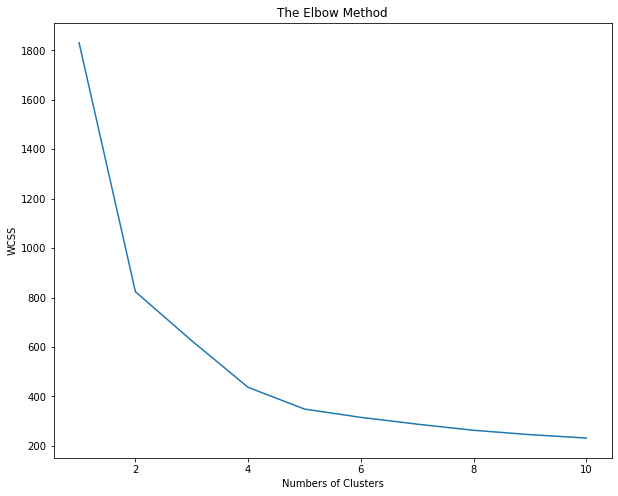

In [46]:
fig = plt.figure(figsize=(10,8))
WCSS=[]
for i in range(1,11):
    clf = KMeans(n_clusters=i)
    clf.fit(data)
    WCSS.append(clf.inertia_)
plt.plot(range(1,11),WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Numbers of Clusters')
plt.show()

In [58]:
clf = KMeans(n_clusters=9)
y_means = clf.fit_predict(data)

In [59]:
y_means
clf.labels_

array([4, 4, 4, ..., 7, 2, 2])

In [60]:
md=pd.Series(y_means)
airlines['clust']=md
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,8
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,8
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,7
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [61]:
airlines.iloc[:,1:7].groupby(airlines.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles
clust,,,,,,
0,99458.351266,91.034810,3.465190,1.003165,1.018987,28799.360759
1,105350.932515,360.935583,1.156442,1.030675,1.018405,9016.325153
2,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349
3,181461.574766,239.957944,4.971963,1.000000,1.093458,83925.654206
4,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885
5,138009.629139,55.086093,3.708609,1.000000,1.026490,34089.261589
6,96138.305263,222.582456,3.564912,1.003509,1.000000,32045.431579
7,68894.029126,147.148867,3.508091,1.000000,1.003236,31584.352751
8,63028.000000,224.236311,1.155620,1.034582,1.000000,8694.507205


Text(0.5, 1.0, 'Clusters using KMeans')

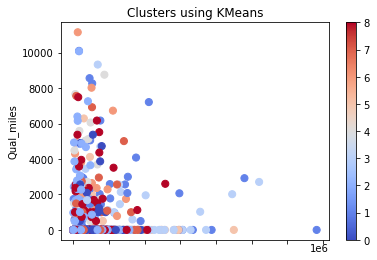

In [67]:
airlines.plot(x='Balance',y='Qual_miles',c=clf.labels_,kind='scatter',s=50,cmap=plt.cm.coolwarm)
plt.title('Clusters using KMeans')

In [64]:
clf.inertia_

243.9244361893846

In [65]:
WCSS

[1830.793212858415,
 823.6756984125232,
 625.1690975109223,
 436.70885761932624,
 348.9433217254147,
 315.3155964842897,
 287.8950613257915,
 263.2146550599808,
 245.45546590328286,
 231.80848725748032]